<a href="https://colab.research.google.com/github/MehwishSameer/Machine-Learning/blob/main/Forecast_loan_default_using_time_series_pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
%load_ext rpy2.ipython
%matplotlib inline

!pip install prophet
import pandas as pd
import logging
import warnings
import csv
from prophet import Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
warnings.filterwarnings("ignore")

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
df=pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [22]:
df.describe()

,y
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


In [26]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

08:03:25 - cmdstanpy - INFO - Chain [1] start processing
08:03:26 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,9.266076,7.918833,9.714827,9.266076,9.266076,-0.421456,-0.421456,-0.421456,-1.224398,...,0.352294,0.352294,0.352294,0.450648,0.450648,0.450648,0.0,0.0,0.0,8.844620
1,2007-12-11,9.264529,7.647295,9.485879,9.264529,9.264529,-0.671386,-0.671386,-0.671386,-1.224398,...,0.119643,0.119643,0.119643,0.433369,0.433369,0.433369,0.0,0.0,0.0,8.593144
2,2007-12-12,9.262983,7.434531,9.374601,9.262983,9.262983,-0.874040,-0.874040,-0.874040,-1.224398,...,-0.066668,-0.066668,-0.066668,0.417026,0.417026,0.417026,0.0,0.0,0.0,8.388943
3,2007-12-13,9.261437,7.407623,9.255900,9.261437,9.261437,-0.894594,-0.894594,-0.894594,-1.224398,...,-0.072259,-0.072259,-0.072259,0.402063,0.402063,0.402063,0.0,0.0,0.0,8.366843
4,2007-12-14,9.259890,7.370022,9.313907,9.259890,9.259890,-0.905094,-0.905094,-0.905094,-1.224398,...,-0.069583,-0.069583,-0.069583,0.388887,0.388887,0.388887,0.0,0.0,0.0,8.354796


In [28]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3000,2016-04-25,8.684925,6.602805,8.496592,8.584950,8.791131,-1.157060,-1.157060,-1.157060,-1.224398,...,0.352294,0.352294,0.352294,-0.284956,-0.284956,-0.284956,0.0,0.0,0.0,7.527865
3001,2016-04-26,8.683898,6.377145,8.223302,8.582028,8.791950,-1.389033,-1.389033,-1.389033,-1.224398,...,0.119643,0.119643,0.119643,-0.284278,-0.284278,-0.284278,0.0,0.0,0.0,7.294865
3002,2016-04-27,8.682871,6.187398,8.069507,8.579106,8.792769,-1.579085,-1.579085,-1.579085,-1.224398,...,-0.066668,-0.066668,-0.066668,-0.288019,-0.288019,-0.288019,0.0,0.0,0.0,7.103786
3003,2016-04-28,8.681845,6.127418,8.078706,8.576184,8.793588,-1.592696,-1.592696,-1.592696,-1.224398,...,-0.072259,-0.072259,-0.072259,-0.296039,-0.296039,-0.296039,0.0,0.0,0.0,7.089149
3004,2016-04-29,8.680818,6.112008,7.993341,8.573359,8.794406,-1.602080,-1.602080,-1.602080,-1.224398,...,-0.069583,-0.069583,-0.069583,-0.308099,-0.308099,-0.308099,0.0,0.0,0.0,7.078738


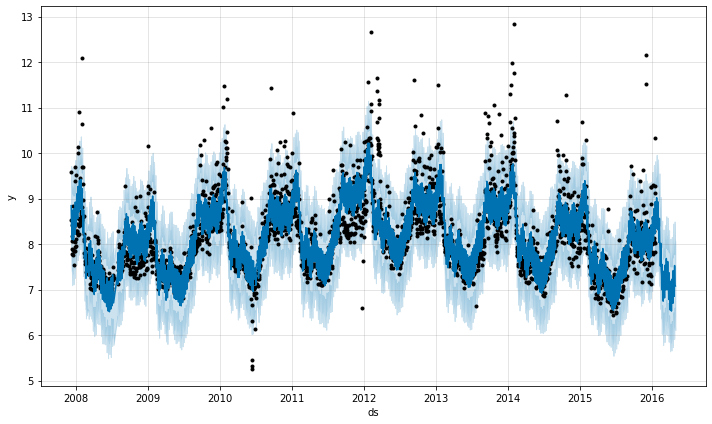

In [29]:
plot1 = m.plot(forecast)

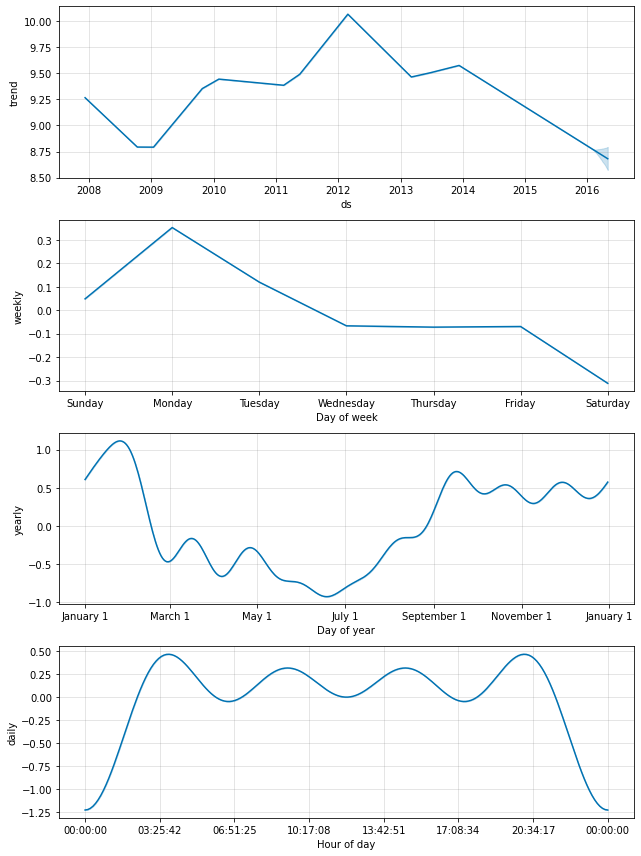

In [30]:
plt2 = m.plot_components(forecast)